In [3]:
import numpy as np
from sympy import init_printing, Matrix
init_printing()
from numpy import cos, sin, pi, round

In [4]:
# Ex 1
A = np.array([[3,-2],[1,4]])

# Beregn determinanten
det_A = np.linalg.det(A)
det_A

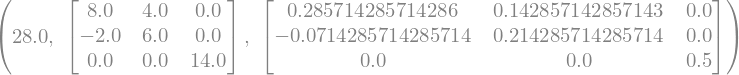

In [ ]:
# Ex 2 - har vi ikke lavety, men det er opgave 2 i bogen!
A = np.array([[3,-2,0],[1,4,0],[0,0,2]])

# Beregn determinanten
det_A = np.linalg.det(A)

# Beregn den adjungerede matrix
adj_A = np.linalg.inv(A)*det_A  # Der findes ikke en indbygget funktion til at finde den adjungerede matrix i numpy, så vi gør det manuelt

# Beregn den inverse matrix
A_inv = adj_A/det_A  # Lidt noller i om med vi lige har brugt .inv(A) til at finde den adjungerede matrix

det_A, Matrix(adj_A), Matrix(A_inv)   # Jeg bruger kun SyPy til at printe matricerne pænt

In [ ]:
# Ex 2

M = np.array([[-0.1495,-0.1986,-0.9685],
              [-0.8256,0.5640,0.0117],
              [-0.5439,-0.8015,0.2484]])

G = M.T @ M  # Gram-matricen

tolerance = 1e-3  # Definer tolerance for numerisk præcision
    
# Tjek om G er diagonal (alle ikke-diagonale elementer skal være tæt på 0)
is_orthogonal = np.allclose(G - np.diag(np.diagonal(G)), 0, atol=tolerance)

# print
print("Er matricen ortogonal?", is_orthogonal)

Er matricen ortogonal? True


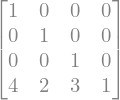

In [ ]:
# Ex 3

# Definerer for en søjlevektor
def translation_matrix(tx, ty, tz):
    """Returnerer en 4x4 translationsmatrix."""
    return np.array([[1, 0, 0, tx],
                     [0, 1, 0, ty],
                     [0, 0, 1, tz],
                     [0, 0, 0, 1]])

# Lav den om til en en rækkevektor
T = translation_matrix(4, 2, 3).T # Definer et punkt i homogene koordinater

Matrix(T)

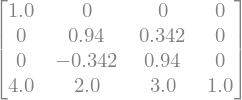

In [18]:
# Ex 4

def translation_matrix(tx, ty, tz):
    """Returnerer en 4x4 translationsmatrix."""
    return np.array([[1, 0, 0, tx],
                     [0, 1, 0, ty],
                     [0, 0, 1, tz],
                     [0, 0, 0, 1]])

def rotation_matrix_x(theta):
    """Returnerer en 4x4 rotationsmatrix om x-aksen."""
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[1, 0,  0, 0],
                     [0, c,  -s, 0],
                     [0, s, c, 0],
                     [0, 0,  0, 1]])

# Transformationer
T = translation_matrix(4, 2, 3).T   # fordi det er rækker
R = rotation_matrix_x(np.radians(20)).T   # fordi det er rækker

# Anvend transformationerne
transformed = R @ T

Matrix(transformed).evalf(3)

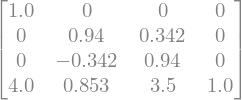

In [19]:
# Ex 5

transformed = T @ R
Matrix(transformed).evalf(3)

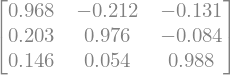

In [29]:
# 1.c

theta_grad = -15  # vinkel i grader


theta = np.radians(theta_grad)  # Vinkel i grader, omregnes til radianer, da np.cos og np.sin forventer radianer
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
one_minus_cos = 1 - cos_theta

np.random.seed(42)
v = np.random.randn(3)
n = v / np.linalg.norm(v)

nx, ny, nz = [0.267, -0.535, 0.802]

# Brug bogens/Tutorial 4's formel for rotation om en arbitrær akse
Matrix(round(np.array([
    [nx**2 * one_minus_cos + cos_theta, nx * ny * one_minus_cos + nz * sin_theta, nx * nz * one_minus_cos - ny * sin_theta],
    [nx * ny * one_minus_cos - nz * sin_theta, ny**2 * one_minus_cos + cos_theta, ny * nz * one_minus_cos + nx * sin_theta],
    [nx * nz * one_minus_cos + ny * sin_theta, ny * nz * one_minus_cos - nx * sin_theta, nz**2 * one_minus_cos + cos_theta]
]), 3))

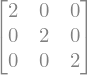

In [30]:
# 2
k = 2 # samme skaleringsfaktor i alle retninger

Matrix(np.array([[k, 0, 0], [0, k, 0], [0, 0, k]]))

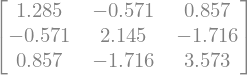

In [33]:
# 3
k = 5
n = np.array([0.267, -0.535, 0.802])
Matrix(round(np.eye(3) + (k-1) * np.outer(n, n), 3))

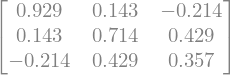

In [ ]:
# 4
k = 0
n = np.array([0.267, -0.535, 0.802])
Matrix(round(np.eye(3) + (k-1) * np.outer(n, n), 3))

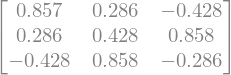

In [35]:
# 5
k = -1
n = np.array([0.267, -0.535, 0.802])
Matrix(round(np.eye(3) + (k-1) * np.outer(n, n), 3))

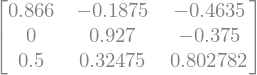

In [61]:
# 6a
a2 * a1 # det kan jeg gøre fordi det er SymPy matricer

In [63]:
# Antag det var numpy

vx = np.radians(-22)
vy = np.radians(30)

Rx = np.array([[1, 0, 0], [0, cos(vx), sin(vx)], [0, -sin(vx), cos(vx)]])
Ry = np.array([[cos(vy), 0, -sin(vy)], [0, 1, 0], [sin(vy), 0, cos(vy)]])

np.round(Ry @ Rx, 3) # matrix multiplikation i numpy

array([[ 0.866, -0.187, -0.464],
       [ 0.   ,  0.927, -0.375],
       [ 0.5  ,  0.324,  0.803]])

In [65]:
# 6b

Rx.T @ Ry.T # matrix multiplikation i numpy

array([[ 0.8660254 ,  0.        ,  0.5       ],
       [-0.1873033 ,  0.92718385,  0.32441883],
       [-0.46359193, -0.37460659,  0.80296477]])

In [66]:
# 6b
np.round((Ry @ Rx).T, 3)

array([[ 0.866,  0.   ,  0.5  ],
       [-0.187,  0.927,  0.324],
       [-0.464, -0.375,  0.803]])

In [68]:
# 6.c
np.round(np.array([0, 0, 1]) @ (Ry @ Rx), 3)

array([0.5  , 0.324, 0.803])